<a href="https://colab.research.google.com/github/NeginKhalifat/TensorFlow_PracticeNotes/blob/main/3_ANN_multiClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnis_dataset = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnis_dataset.load_data()

# Show random Image in Dataset

Text(0.5, 1.0, 'actual_data: 8')

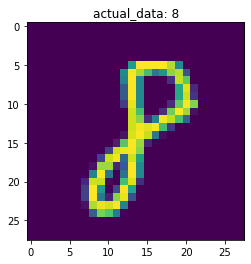

In [ ]:
i = np.random.choice(len(X_test))
plt.imshow(X_test[i],cmap=None)
plt.title("actual_data: %s"%(y_test[i]))

# Scale images to the [0, 1] range

In [ ]:
X_train=X_train/255.0
X_test = X_test/255.0
X_train.shape

(60000, 28, 28)

# Build the model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), # 28* 28 =>1*784
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10,activation='softmax'),
])

# Dropout:

it’s a regularizer technique that reduces the odds of overfitting by dropping out neurons at random, during every epoch

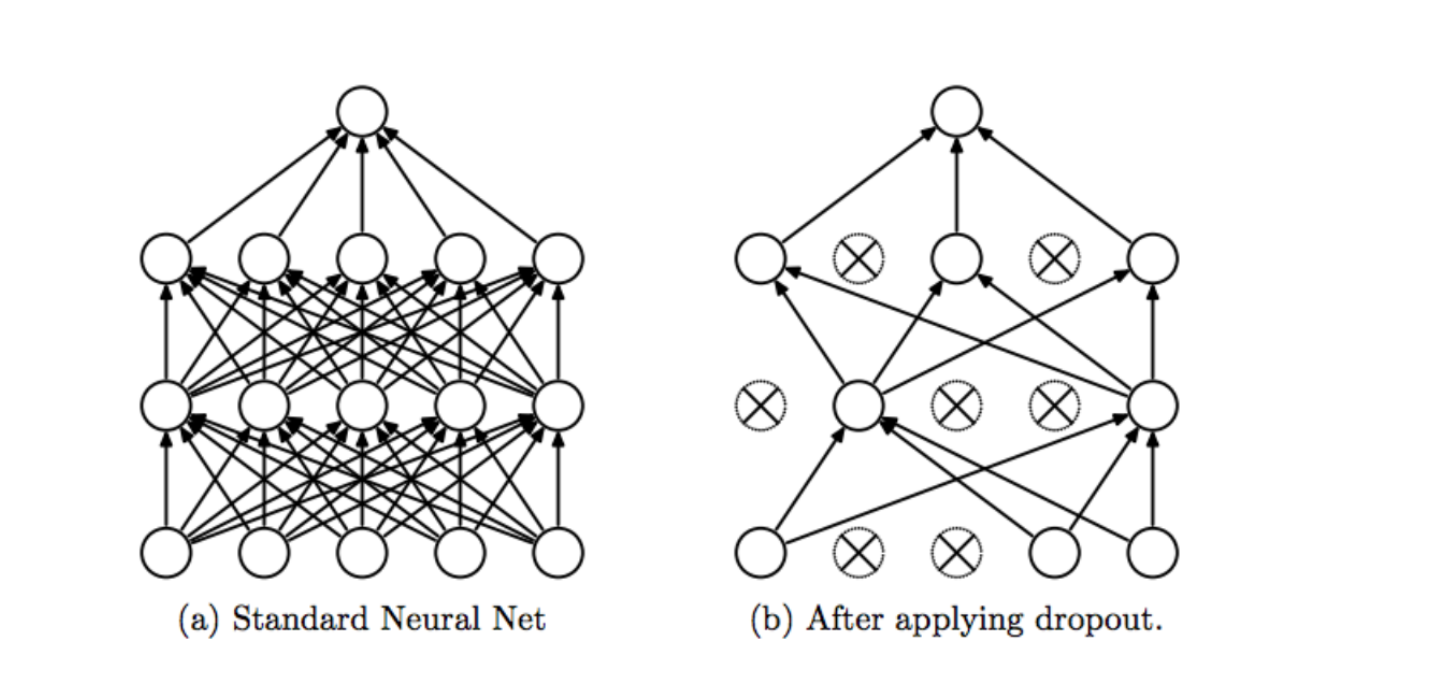

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# sparse_categorical_crossentropy:

reduce memory usage

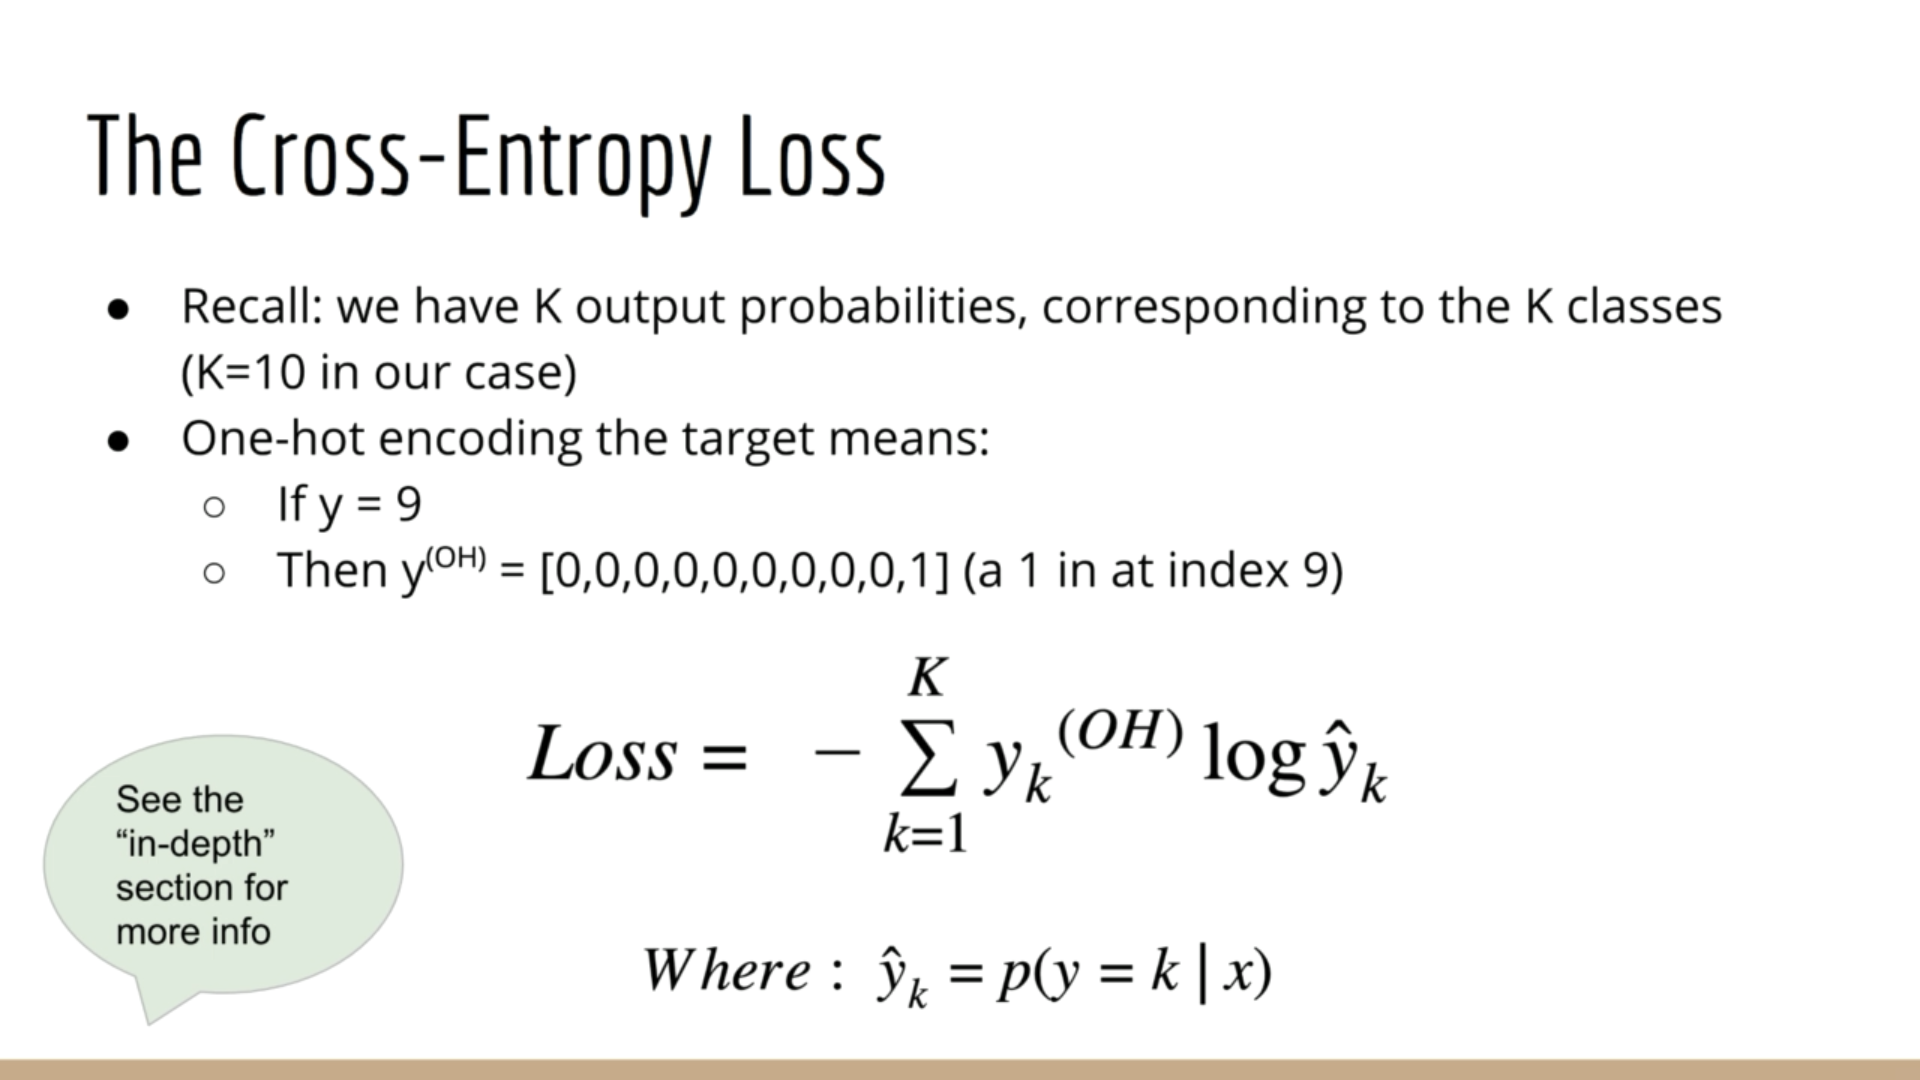

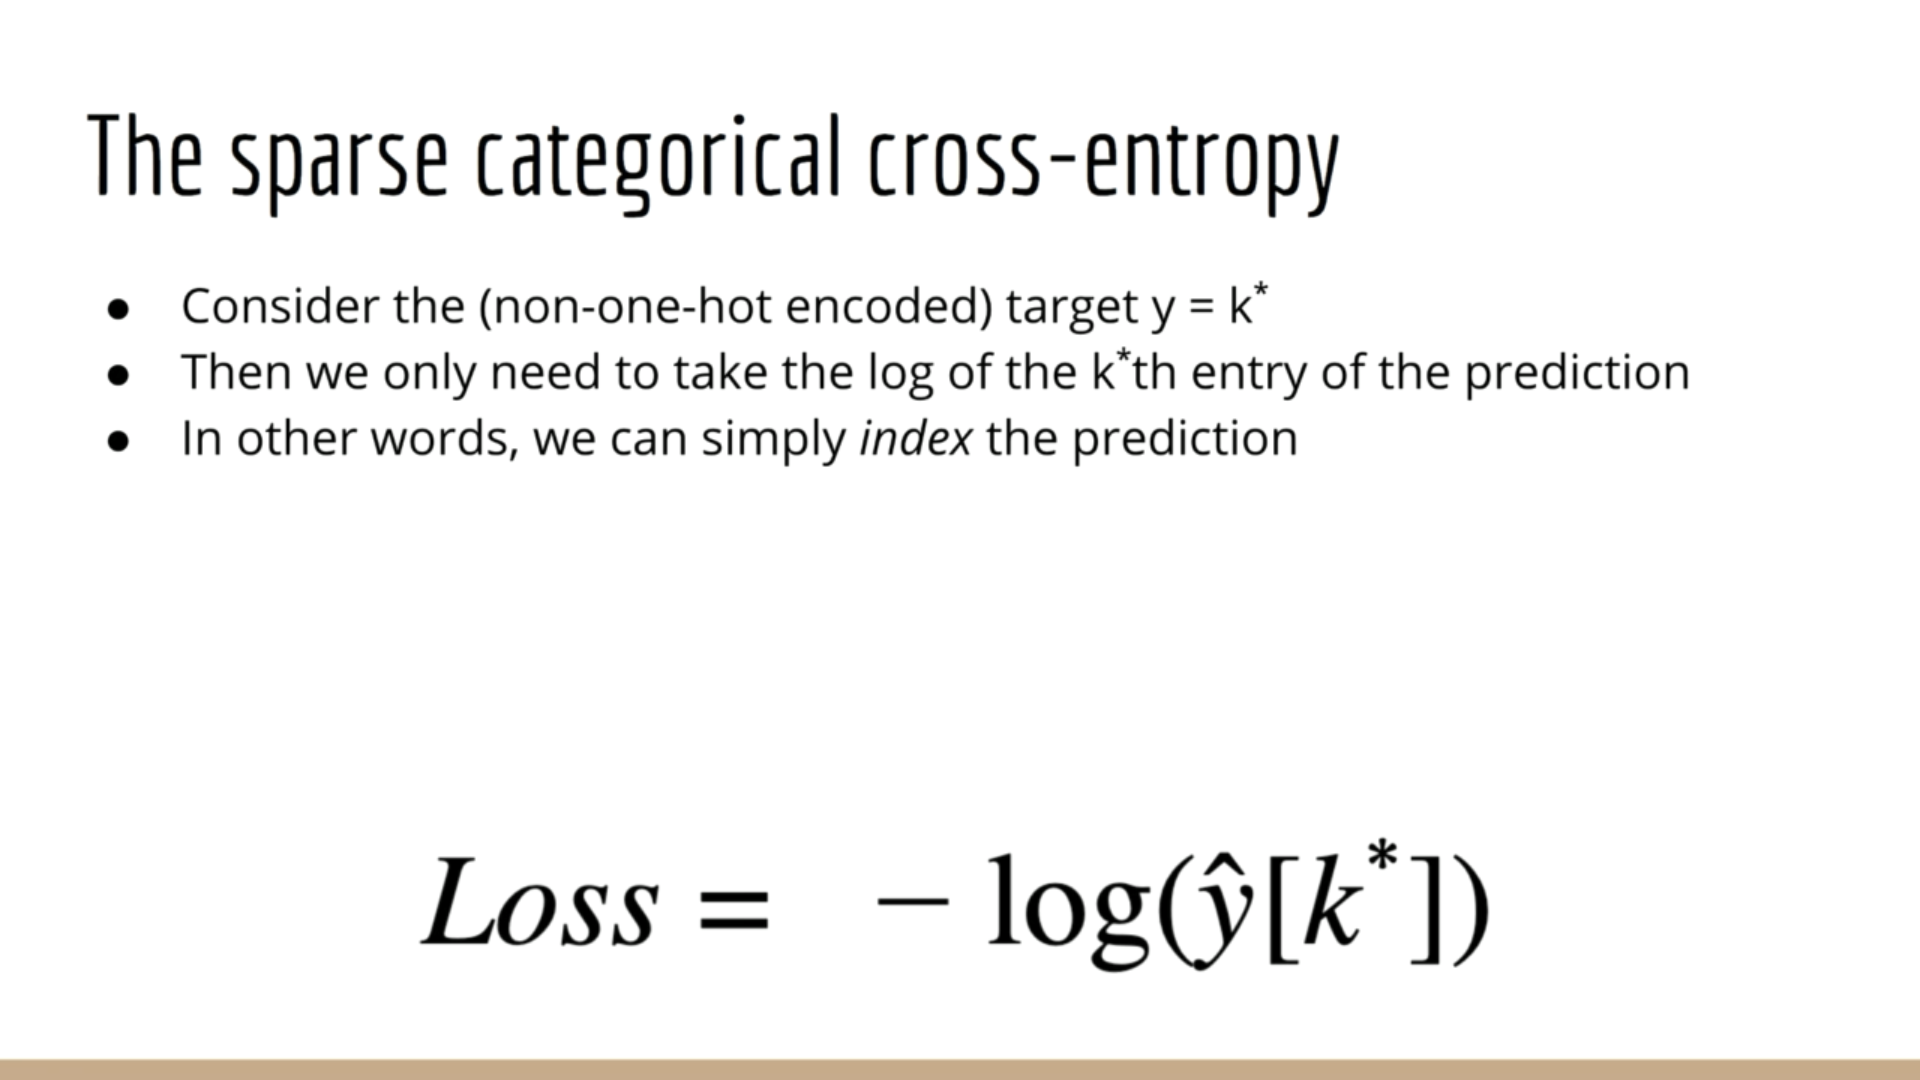

# Train the model

In [ ]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4828 - accuracy: 0.8580 - val_loss: 0.1481 - val_accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1541 - accuracy: 0.9546 - val_loss: 0.1068 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1074 - accuracy: 0.9672 - val_loss: 0.0902 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9728 - val_loss: 0.0809 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.0730 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0550 - accuracy: 0.9814 - val_loss: 0.0694 - val_accuracy:

# Plot Accuracy

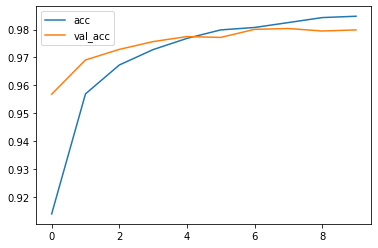

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

# Plot Loss

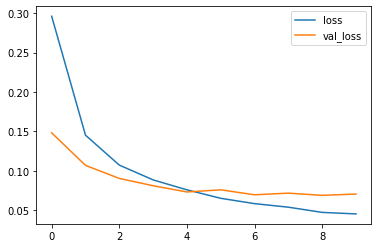

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

# Plot Confusion Matrix

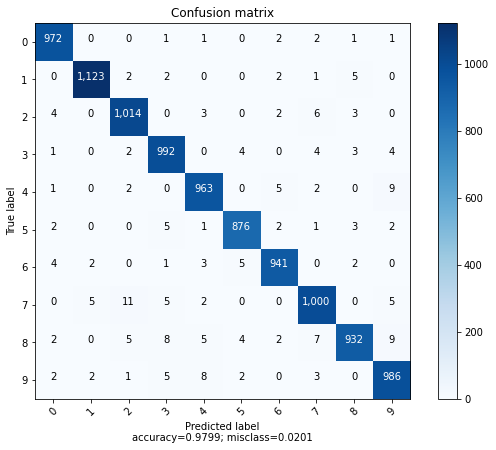

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
 
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
from sklearn.metrics import  confusion_matrix
y_pred=model.predict(X_test).argmax(axis=1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred), list(range(10)))

# Misclassification

Text(0.5, 1.0, 'actual_data: 7, Predict: 2')

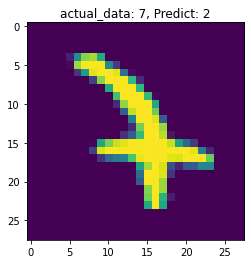

In [ ]:
misclassified_idx=np.where(y_pred!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap=None)
plt.title("actual_data: %s, Predict: %s"%(y_test[i],y_pred[i]))